<a href="https://colab.research.google.com/github/Tezashree/DataScienceBootcamp/blob/main/Projects/titanic_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of males: 577
Number of females: 314
Number of males and females who survived:
Sex
female    233
male      109
Name: Survived, dtype: int64
             max  min       mean
Pclass                          
1       512.3292  0.0  84.154687
2        73.5000  0.0  20.662183
3        69.5500  0.0  13.675550
AgeGroup
old      134
adult    114
child     42
Name: count, dtype: int64
Number of people embarking from each port:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Number of males and females embarking from each port:
Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441
KNN Score: 0.7752808988764045
Random Forest Score: 0.7865168539325843
Decision Tree Score: 0.7528089887640449
Cross-validated scores: [0.7752809  0.79213483 0.85955056 0.7752809  0.84180791]
Confusion Matrix:
 [[84 25]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.

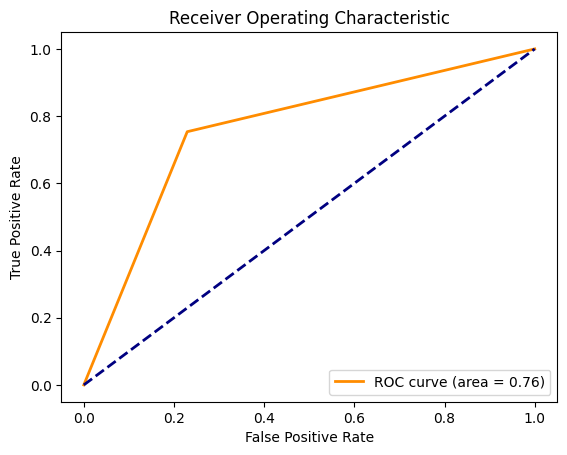

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv("titanic_Train.csv")

# Count the number of males and females
sex_counts = df['Sex'].value_counts()
print("Number of males:", sex_counts['male'])
print("Number of females:", sex_counts['female'])

# Male and Female Survived
survived_counts = df.groupby('Sex')['Survived'].sum()
print("Number of males and females who survived:")
print(survived_counts)

# Max, Min, Avg. Price
class_stats = df.groupby('Pclass')['Fare'].agg(['max', 'min', 'mean'])
print(class_stats)

# Age of survived passengers
bins = [0, 14, 30, 150]
labels = ['child', 'adult', 'old']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
survivors_age = df[df['Survived'] == 1]['AgeGroup'].value_counts()
print(survivors_age)

# People starting their journey
embark_counts = df['Embarked'].value_counts()
gender_counts = df.groupby('Embarked')['Sex'].value_counts().unstack()
print("Number of people embarking from each port:")
print(embark_counts)
print("\nNumber of males and females embarking from each port:")
print(gender_counts)

# Removing columns
remove_columns = ["PassengerId", "Name", "Ticket"]
df = df.drop(remove_columns, axis=1)
df = df.drop(columns=["Cabin", "AgeGroup"])
df = df.dropna(subset=["Embarked"])

# Fill NaN values in the age column with mean
mean_age = df["Age"].mean()
df['Age'] = df['Age'].fillna(mean_age)

# One-hot-encoding for categorical features
categorical_features = ["Sex", "Embarked"]
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Perform min-max scaling for Numerical columns
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Fare']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Train-Test Split
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_score = knn_classifier.score(X_test, y_test)
print("KNN Score:", knn_score)

# Random Forest
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(X_train, y_train)
randomforest_score = randomforest_classifier.score(X_test, y_test)
print("Random Forest Score:", randomforest_score)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)
decisiontree_score = decisiontree_classifier.score(X_test, y_test)
print("Decision Tree Score:", decisiontree_score)

# Model Evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Cross-validation scores
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
